In [19]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('HR_Comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [22]:
retain = df[df['left']==0]
retain.shape

(11428, 10)

In [23]:
newdf = df.drop(columns = ['Department','salary'])

In [24]:
newdf.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

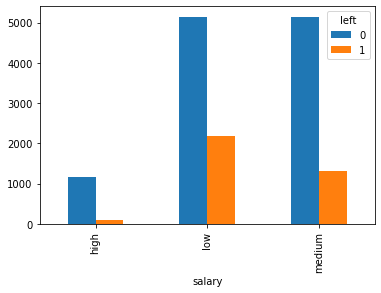

In [26]:
pd.crosstab(df['salary'],df['left']).plot(kind = 'bar')

<AxesSubplot:xlabel='Department'>

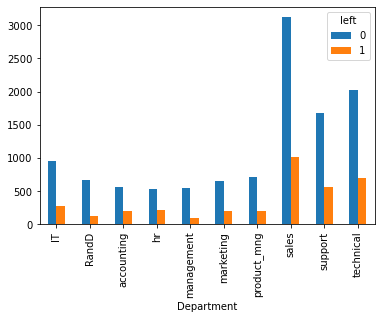

In [27]:
pd.crosstab(df['Department'],df['left']).plot(kind = 'bar')

In [84]:
newdf = df.drop(columns = ['last_evaluation','number_project','left','time_spend_company','Work_accident','Department'])
print(newdf.to_string())

       satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                    0.38                   157                      0     low
1                    0.80                   262                      0  medium
2                    0.11                   272                      0  medium
3                    0.72                   223                      0     low
4                    0.37                   159                      0     low
5                    0.41                   153                      0     low
6                    0.10                   247                      0     low
7                    0.92                   259                      0     low
8                    0.89                   224                      0     low
9                    0.42                   142                      0     low
10                   0.45                   135                      0     low
11                   0.11                   305     

In [85]:
newdf1 = pd.get_dummies(newdf,dtype=int)
print(newdf1.to_string())

       satisfaction_level  average_montly_hours  promotion_last_5years  salary_high  salary_low  salary_medium
0                    0.38                   157                      0            0           1              0
1                    0.80                   262                      0            0           0              1
2                    0.11                   272                      0            0           0              1
3                    0.72                   223                      0            0           1              0
4                    0.37                   159                      0            0           1              0
5                    0.41                   153                      0            0           1              0
6                    0.10                   247                      0            0           1              0
7                    0.92                   259                      0            0           1              0
8

In [86]:
from sklearn.linear_model import LogisticRegression
X = newdf1
Y = df['left']
print(X)
print(Y)

       satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary_high  salary_low  salary_medium  
0                0           1              0  
1              

In [87]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [92]:
anslog = model.predict([[0,345,0,1,0,0],[1,345,1,0,1,0],[0,672,0,0,0,1]])
anslog

array([0, 0, 1], dtype=int64)

In [93]:
model.score(X,Y)

0.7757850523368225

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)

In [95]:
modelTrainTest = LogisticRegression()
modelTrainTest.fit(X_train,Y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
traintestans = modelTrainTest.score(X_train,Y_train)
traintestans

0.7762467774913325